## How do these statistics line up by player in relation to the top players/teams (MVPs) of the 2022-2023 season

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
import seaborn as sns

from scipy.stats import linregress

In [133]:
cd /Users/christopherbaker_1/desktop

/Users/christopherbaker_1/Desktop


In [134]:
# read csv file
stats_2023 = pd.read_csv("latest_RAPTOR_by_team.csv")

In [135]:
stats_2023.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2023,RS,TOR,2328,1140,-2.442459,0.605968,-1.836491,...,-1.771180,-0.283673,-2.054852,0.400488,0.400488,0.000000,-1.867986,-0.182806,-2.050792,-0.956065
1,Steven Adams,adamsst01,2023,RS,MEM,2391,1133,-0.539149,4.174473,3.635324,...,0.416279,3.550985,3.967264,3.892111,3.892111,0.000000,0.025097,3.570024,3.595120,0.237905
2,Bam Adebayo,adebaba01,2023,PO,MIA,1681,850,-2.042952,1.343185,-0.699767,...,-1.667750,1.933160,0.265409,1.342984,0.000000,1.342984,-0.347436,2.167669,1.820232,-0.415820
3,Bam Adebayo,adebaba01,2023,RS,MIA,5252,2598,-1.861596,2.663534,0.801939,...,-1.154758,2.718460,1.563703,5.692164,5.692164,0.000000,-0.957159,2.658545,1.701386,-0.452741
4,Ochai Agbaji,agbajoc01,2023,RS,UTA,2604,1209,-1.323938,-2.198396,-3.522334,...,-1.010696,-1.964927,-2.975622,-0.139469,-0.139469,0.000000,-1.145865,-2.506387,-3.652252,0.216216


In [136]:
# fill all null values with 0 
clean_df_2023 = stats_2023.fillna(0)

In [137]:
clean_df_2023

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2023,RS,TOR,2328,1140,-2.442459,0.605968,-1.836491,...,-1.771180,-0.283673,-2.054852,0.400488,0.400488,0.000000,-1.867986,-0.182806,-2.050792,-0.956065
1,Steven Adams,adamsst01,2023,RS,MEM,2391,1133,-0.539149,4.174473,3.635324,...,0.416279,3.550985,3.967264,3.892111,3.892111,0.000000,0.025097,3.570024,3.595120,0.237905
2,Bam Adebayo,adebaba01,2023,PO,MIA,1681,850,-2.042952,1.343185,-0.699767,...,-1.667750,1.933160,0.265409,1.342984,0.000000,1.342984,-0.347436,2.167669,1.820232,-0.415820
3,Bam Adebayo,adebaba01,2023,RS,MIA,5252,2598,-1.861596,2.663534,0.801939,...,-1.154758,2.718460,1.563703,5.692164,5.692164,0.000000,-0.957159,2.658545,1.701386,-0.452741
4,Ochai Agbaji,agbajoc01,2023,RS,UTA,2604,1209,-1.323938,-2.198396,-3.522334,...,-1.010696,-1.964927,-2.975622,-0.139469,-0.139469,0.000000,-1.145865,-2.506387,-3.652252,0.216216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,Omer Yurtseven,yurtsom01,2023,RS,MIA,177,83,1.659495,-7.678176,-6.018681,...,2.486415,-7.487443,-5.001027,-0.095551,-0.095551,0.000000,1.332271,-5.782120,-4.449850,0.241523
822,Cody Zeller,zelleco01,2023,PO,MIA,354,174,-4.691477,-1.659638,-6.351115,...,-3.408309,-1.285457,-4.693766,-0.178537,0.000000,-0.178537,-3.123433,-2.253790,-5.377222,0.312978
823,Cody Zeller,zelleco01,2023,RS,MIA,447,217,-1.382510,-5.605615,-6.988125,...,-1.370539,-5.780102,-7.150641,-0.488714,-0.488714,0.000000,-1.658070,-3.760831,-5.418901,0.311628
824,Ivica Zubac,zubaciv01,2023,PO,LAC,274,130,-3.282714,11.150790,7.868076,...,-3.769316,8.511745,4.742429,0.515322,0.000000,0.515322,-4.849337,5.794117,0.944780,0.534762


In [138]:
clean_df_2023.describe()

,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,826.0,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,2023.0,1613.684019,769.199758,-1.232587,-0.265964,-1.498551,-2.149929,0.945157,-1.204772,-1.497868,-0.028621,-1.526489,1.126431,1.016177,0.110254,-1.375391,-0.613072,-1.988463,0.130569
std,0.0,1636.953006,782.580975,5.511909,5.644426,8.080948,9.597225,6.990852,10.653763,5.990461,5.317025,8.067727,2.303181,2.301489,0.481804,5.269645,5.211631,8.106104,1.221475
min,2023.0,1.000000,0.000000,-74.359220,-64.933861,-71.012853,-74.277126,-35.366970,-70.845934,-78.659427,-54.515230,-75.385610,-3.045436,-3.045436,-0.547170,-75.354256,-59.165453,-79.698981,-4.220434
25%,2023.0,249.250000,118.000000,-2.601496,-1.963951,-3.822264,-4.191947,-2.207020,-4.678642,-2.997662,-1.855767,-3.810309,-0.055486,0.000000,0.000000,-2.976436,-2.138523,-4.447815,-0.467297
50%,2023.0,962.500000,459.000000,-1.039920,-0.237402,-0.974020,-1.030933,0.104449,-0.736064,-0.969355,-0.144062,-0.986194,0.234817,0.007369,0.000000,-1.171339,-0.387268,-1.349334,0.017906
75%,2023.0,2737.000000,1278.250000,0.942240,1.367241,1.472506,1.644804,2.789355,2.998780,0.981602,1.613217,1.577875,1.524143,1.297288,0.000000,0.851118,1.292142,1.464437,0.551239
max,2023.0,6026.000000,2842.000000,29.980748,58.195329,57.253239,30.687169,61.557315,55.533363,31.083234,50.486141,59.363461,20.310952,20.310952,5.556234,21.382141,47.358320,68.740461,9.876947


## Functions 

In [139]:
# Linear regression

def regression_plot(x_axis, y_axis, xlabel, ylabel, text_coordinates, x=0, y=0):
    

    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_axis, y_axis, marker=r'8', c="#F94C10", s=50, alpha=0.7, edgecolor="#F94C10")
    plt.plot(x_axis, regress_values, "r:", alpha=0.5)
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"{xlabel} vs {ylabel} by Teams", color="#F94C10", weight="bold")
    plt.grid(True, color="b", alpha=0.10)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="#F94C10")
    plt.annotate(line_eq, xy=(x, y), xycoords='axes fraction', fontsize=10, color="red")
    print(f"The r-value is: {rvalue**2}")
    for team, txt in enumerate(team_names):
        plt.annotate(txt, (x_axis[team], y_axis[team]), color="#F94C10",alpha=0.5)
        
    plt.show()

In [140]:
# bar plot

def bar_plot(x_axis, y_axis, ylabel, title, size):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis, y_axis, alpha=0.5, color="#F94C10")
    ax.bar_label(bar_container, fmt='{:,.0f}')
    plt.xlabel("Player Names", weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"Top 10 {title}", weight="bold")
    plt.xticks(rotation=45)

    plt.show()

In [141]:
# averages 

## Top / MVP Players

In [142]:
# Filter players based on the given conditions
player_filter = clean_df_2023[(clean_df_2023['poss'] > 2000) & (clean_df_2023['mp'] > 1350)]

# Group by player_name and aggregate the statistics
grouped_players = (player_filter.groupby('player_name')
                   .agg({
                       'raptor_total': 'sum',
                       'raptor_box_total': 'sum',
                       'raptor_offense': 'sum',
                       'raptor_defense': 'sum',
                       'war_total': 'sum'
                   }))

# Compute the player score
grouped_players['player_score'] = (grouped_players['raptor_total'] + 
                                   grouped_players['raptor_box_total'] + 
                                   grouped_players['raptor_offense'] + 
                                   grouped_players['raptor_defense'] + 
                                   grouped_players['war_total'])

# Sort players based on the player score and reset the index
sorted_players = (grouped_players.sort_values(by='player_score', ascending=False)
                          .reset_index())

# Adjusting the index to start from 1
sorted_players.index += 1

# Display top 10 players based on the player score
top_players = sorted_players[['player_name', 'player_score']].head(10)
top_players


,player_name,player_score
1,Nikola Jokic,62.052979
2,Joel Embiid,37.469713
3,Luka Doncic,37.156539
4,Damian Lillard,35.136630
5,Anthony Davis,31.542043
6,Jimmy Butler,30.841194
7,Stephen Curry,28.708652
8,Kawhi Leonard,28.237439
9,Giannis Antetokounmpo,27.626538
10,James Harden,27.133886


## Top players - Bar plot 

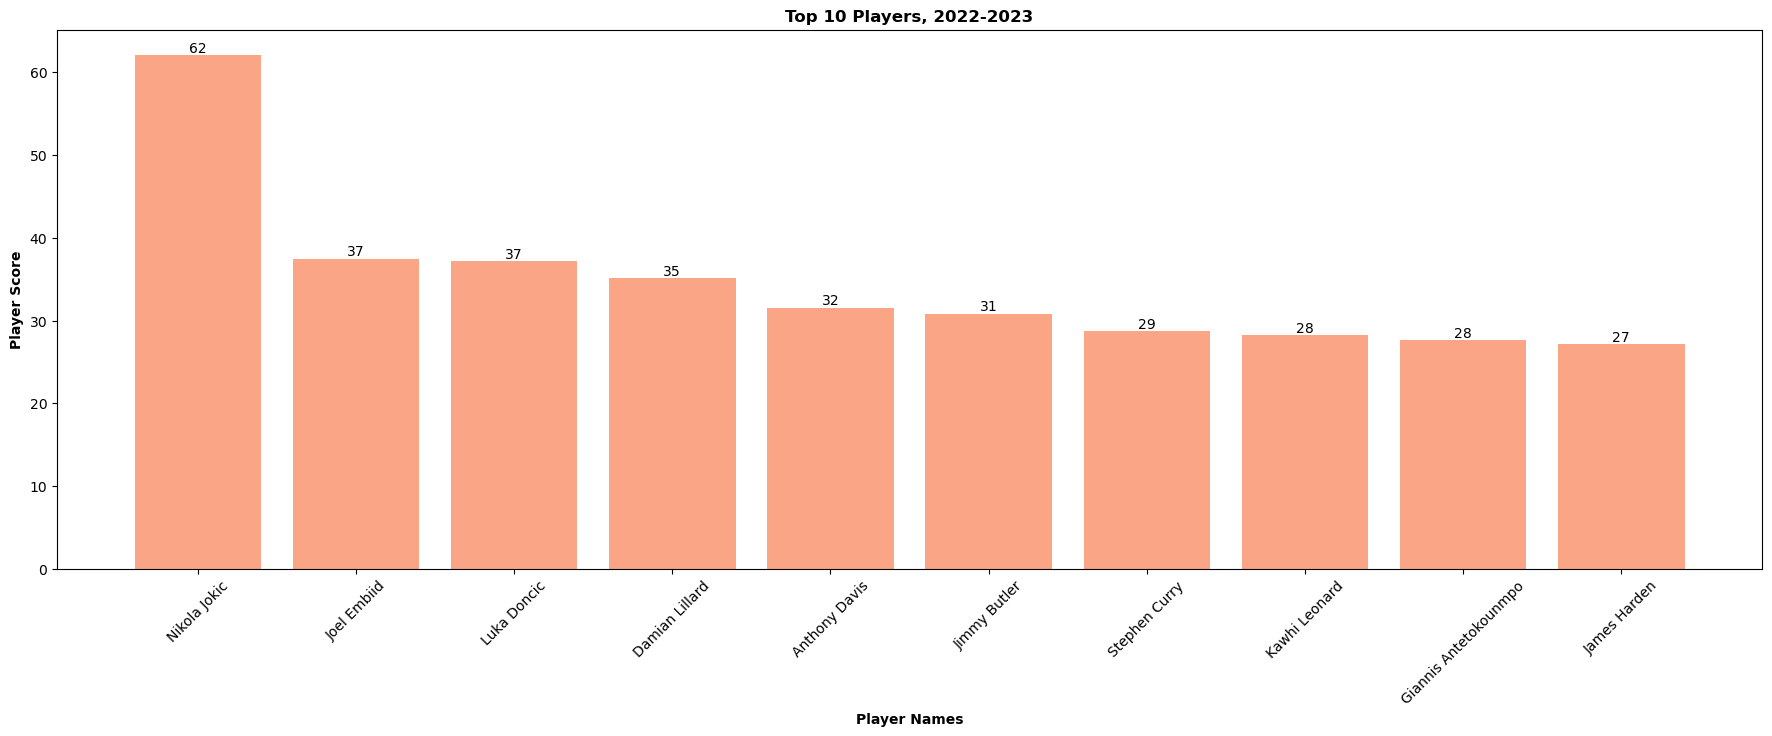

In [143]:
player_score = top_players["player_score"]
player_names = top_players["player_name"]

bar_plot(player_names, player_score, "Player Score", "Players, 2022-2023", (22,7))

## Player Raptor total 

In [144]:
# Sort players based on "raptor_total" and reset the index
player_raptor_total = (player_filter.sort_values(by='raptor_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
player_raptor_total.index += 1

# Display top 10 players based on "raptor_total"
top_player_raptor_total = player_raptor_total[['player_name', 'raptor_total']].head(10)
top_player_raptor_total


,player_name,raptor_total
1,Nikola Jokic,14.092699
2,Joel Embiid,8.209079
3,Luka Doncic,7.823608
4,Damian Lillard,7.816497
5,Anthony Davis,7.284084
6,Kawhi Leonard,6.776905
7,Jimmy Butler,6.585158
8,Stephen Curry,6.465326
9,Giannis Antetokounmpo,6.130142
10,Alex Caruso,5.990284


## Player Raptor box total 

In [145]:
# Sort players based on "raptor_box_total" and reset the index
raptor_box_total = (player_filter.sort_values(by='raptor_box_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_box_total.index += 1

# Display top 10 players based on "raptor_box_total"
top_raptor_box_players = raptor_box_total[['player_name', 'raptor_box_total']].head(10)
top_raptor_box_players

,player_name,raptor_box_total
1,Nikola Jokic,13.556629
2,Luka Doncic,8.524930
3,Joel Embiid,8.228086
4,Damian Lillard,7.982161
5,Jimmy Butler,7.557962
6,Anthony Davis,7.206066
7,Stephen Curry,6.487038
8,James Harden,6.355144
9,Kawhi Leonard,6.232844
10,Giannis Antetokounmpo,6.052568


## Player Raptor offense 

In [146]:
# Sort players based on "raptor_offense" and reset the index
raptor_offense = (player_filter.sort_values(by='raptor_offense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_offense.index += 1

# Display top 10 players based on "raptor_offense"
top_raptor_offense_players = raptor_offense[['player_name', 'raptor_offense']].head(10)
top_raptor_offense_players

,player_name,raptor_offense
1,Nikola Jokic,9.972458
2,Damian Lillard,9.282637
3,Luka Doncic,8.272470
4,Stephen Curry,7.492136
5,Tyrese Haliburton,6.902477
6,Jimmy Butler,6.122845
7,Donovan Mitchell,5.873647
8,James Harden,5.523897
9,Devin Booker,5.324811
10,Trae Young,5.168245


## Player Raptor defense 

In [147]:
# Sort players based on "raptor_defense" and reset the index
raptor_defense = (player_filter.sort_values(by='raptor_defense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
raptor_defense.index += 1

# Display top 10 players based on "raptor_defense"
top_raptor_defense_players = raptor_defense[['player_name', 'raptor_defense']].head(10)
top_raptor_defense_players

,player_name,raptor_defense
1,Alex Caruso,6.133136
2,Brook Lopez,5.020746
3,Anthony Davis,4.612329
4,Nikola Jokic,4.120241
5,Rudy Gobert,4.063762
6,Joel Embiid,3.677943
7,Herbert Jones,3.494237
8,Draymond Green,3.466689
9,Dennis Smith Jr.,3.464712
10,John Konchar,3.266538


## Player War total 

In [148]:
# Sort players based on "war_total" and reset the index
war_total = (player_filter.sort_values(by='war_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
war_total.index += 1

# Display top 10 players based on "war_total"
top_war_total_players = war_total[['player_name', 'war_total']].head(10)
top_war_total_players

,player_name,war_total
1,Nikola Jokic,20.310952
2,Luka Doncic,12.984393
3,Joel Embiid,12.823468
4,Damian Lillard,11.521474
5,Jimmy Butler,10.112917
6,Fred VanVleet,10.010870
7,Shai Gilgeous-Alexander,9.862723
8,Anthony Davis,9.767810
9,Donovan Mitchell,9.445017
10,Giannis Antetokounmpo,9.313686


## Top teams

In [149]:
# Filter teams based on the given conditions
team_filter = clean_df_2023[(clean_df_2023['poss'] > 1500) & (clean_df_2023['mp'] > 1250)]

# Group by team and aggregate the statistics
grouped_teams = (team_filter.groupby('team')
                   .agg({
                       'raptor_total': 'sum',
                       'raptor_box_total': 'sum',
                       'raptor_offense': 'sum',
                       'raptor_defense': 'sum',
                       'war_total': 'sum'
                   }))

# Compute the team score
grouped_teams['team_score'] = (grouped_teams['raptor_total'] + 
                                   grouped_teams['raptor_box_total'] + 
                                   grouped_teams['raptor_offense'] + 
                                   grouped_teams['raptor_defense'] + 
                                   grouped_teams['war_total'])

# Sort teams based on the teams score and reset the index
sorted_teams = (grouped_teams.sort_values(by='team_score', ascending=False)
                          .reset_index())

# Adjusting the index to start from 1
sorted_teams.index += 1

# Display the top 10 teams based on the player score
top_teams = sorted_teams[['team', 'team_score']].head(10)
top_teams

,team,team_score
1,DEN,96.026179
2,BOS,82.618414
3,MIL,78.389680
4,CLE,76.217487
5,MEM,61.719364
6,NYK,61.505522
7,PHI,57.576839
8,GSW,56.219423
9,BRK,51.799579
10,TOR,50.866803


## Top team - Bar plot 

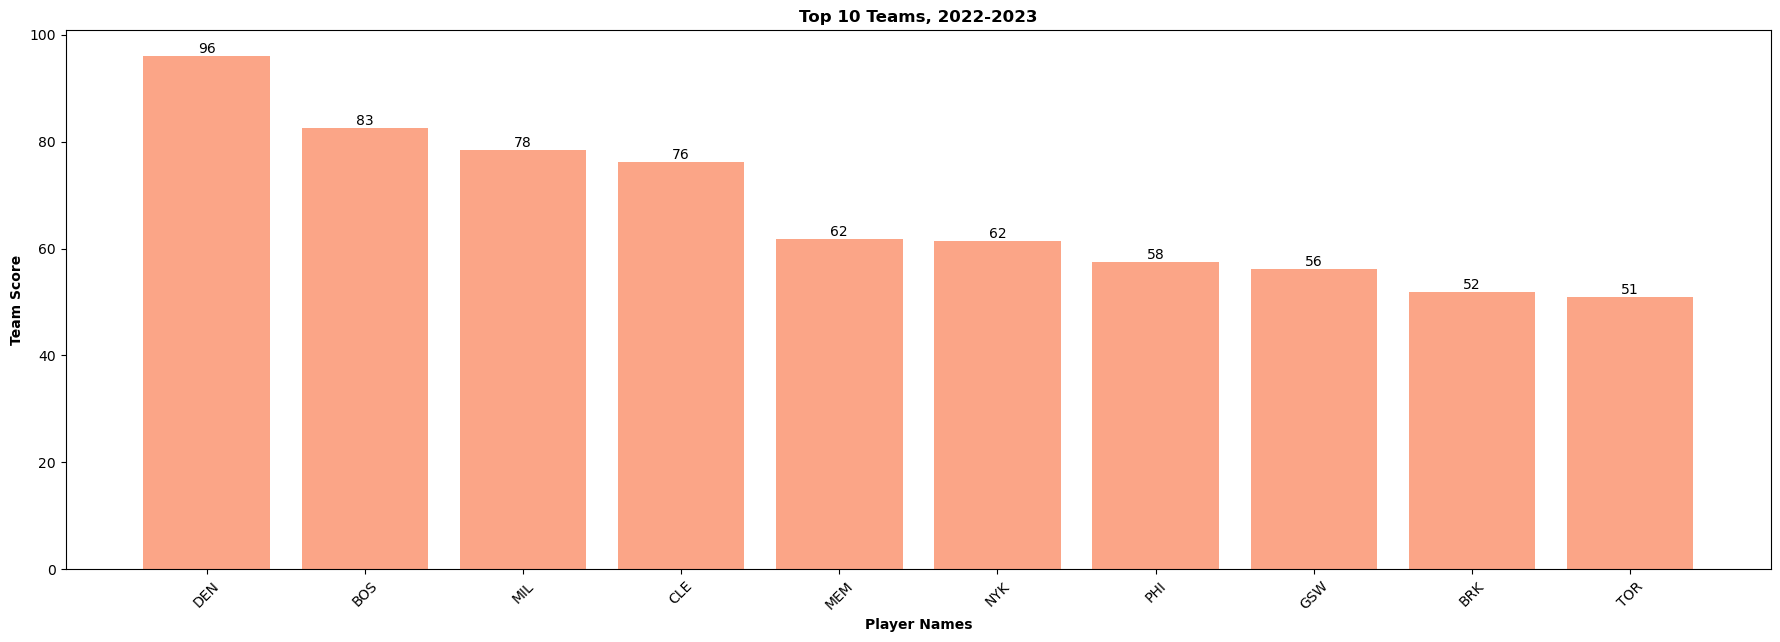

In [150]:
team_score = top_teams["team_score"]
teams = top_teams["team"]

bar_plot(teams, team_score, "Team Score", "Teams, 2022-2023", (22,7))

## Top Teams - Raptor total

In [151]:
# Sort team based on "raptor_total" and reset the index
team_raptor_total = (player_filter.sort_values(by='raptor_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_total.index += 1

# Display the top 10 teams based on "raptor_total"
top_team_raptor_total = team_raptor_total[['team', 'raptor_total']].head(10)
top_team_raptor_total

,team,raptor_total
1,DEN,14.092699
2,PHI,8.209079
3,DAL,7.823608
4,POR,7.816497
5,LAL,7.284084
6,LAC,6.776905
7,MIA,6.585158
8,GSW,6.465326
9,MIL,6.130142
10,CHI,5.990284


## Team Raptor box total

In [152]:
# Sort teams based on "raptor_box_total" and reset the index
team_raptor_box_total = (player_filter.sort_values(by='raptor_box_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_box_total.index += 1

# Display top 10 teams based on "raptor_box_total"
top_team_raptor_box_total = team_raptor_box_total[['team', 'raptor_box_total']].head(10)
top_team_raptor_box_total

,team,raptor_box_total
1,DEN,13.556629
2,DAL,8.524930
3,PHI,8.228086
4,POR,7.982161
5,MIA,7.557962
6,LAL,7.206066
7,GSW,6.487038
8,PHI,6.355144
9,LAC,6.232844
10,MIL,6.052568


## Team Raptor offense 

In [153]:
# Sort teams based on "raptor_offense" and reset the index
team_raptor_offense = (player_filter.sort_values(by='raptor_offense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_offense.index += 1

# Display top 10 teams based on "raptor_offense"
top_team_raptor_offense = team_raptor_offense[['team', 'raptor_offense']].head(10)
top_team_raptor_offense

,team,raptor_offense
1,DEN,9.972458
2,POR,9.282637
3,DAL,8.272470
4,GSW,7.492136
5,IND,6.902477
6,MIA,6.122845
7,CLE,5.873647
8,PHI,5.523897
9,PHO,5.324811
10,ATL,5.168245


## Top Teams - Raptor Defense 

In [154]:
# Sort teams based on "raptor_defense" and reset the index
team_raptor_defense = (player_filter.sort_values(by='raptor_defense', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_raptor_defense.index += 1

# Display top 10 teams based on "raptor_defense"
top_team_raptor_defense = team_raptor_defense[['team', 'raptor_defense']].head(10)
top_team_raptor_defense

,team,raptor_defense
1,CHI,6.133136
2,MIL,5.020746
3,LAL,4.612329
4,DEN,4.120241
5,MIN,4.063762
6,PHI,3.677943
7,NOP,3.494237
8,GSW,3.466689
9,CHA,3.464712
10,MEM,3.266538


## Top Teams - War Total 

In [155]:
# Sort teams based on "war_total" and reset the index
team_war_total = (player_filter.sort_values(by='war_total', ascending=False)
                         .reset_index(drop=True))

# Adjusting the index to start from 1
team_war_total.index += 1

# Display top 10 teams based on "war_total"
top_team_war_total = team_war_total[['team', 'war_total']].head(10)
top_team_war_total

,team,war_total
1,DEN,20.310952
2,DAL,12.984393
3,PHI,12.823468
4,POR,11.521474
5,MIA,10.112917
6,TOR,10.010870
7,OKC,9.862723
8,LAL,9.767810
9,CLE,9.445017
10,MIL,9.313686
